## Q2 (25%). Climate change has found to change the pattern of rainfall globally. Taking advantage of having the access to a very long data set of 5-min rainfall records from Germany, we can use linear regression to identify the presence or absence of significant trends in the annual rainfall and the extreme rainfall at 1-hour timescale. 

## Your task here is to analyse if there are any increasing trends, in term of annual rainfall and 1-hour rainfall extremes, exhibting in the rainfall records from the file _Nettebach_5MIN.csv_. 

### 2.0. Import essential modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

### 2.1 (9%) Import 5-min records from the file _Nettebach_5MIN.csv_ from the _Data_ folder. Compute rainfall totals and the 99th-percentile rainfall at 1-hour timescale for each year and perform linear regression over each of these time series. Please make a plot with two subplots (top and bottom), illustrating the rainfall calculation and regression results. 

#### Note for the plot:
* The size of the plot is 9-inch width and 7-inch height.
* The x-axis is for years and the y-axis for annual rainfall (top subplot) and 1-h rainfall extremes (bottom subplot).
* The line for 1-year or 1-h rainfall is plotted with blue solid line, and the name of the line is 'obs'.
* The line for the regresssion line is plotted with red solid line, and the name of the line is 'reg'.
* The text labels for x-axis ('year') and y-axis ('rainfll depth (mm)') for the both subplots.
* legend is required.
* The plot titles shall be ('Annual rainfall: 1960-2008') and ('1-h Extreme (99p): 1960-2008'), respectively, for the top and bottom subplots. 

In [2]:
path='Data/Nettebach_5MIN.csv'
df = pd.read_csv(path)

df['datatime'] = pd.to_datetime(df['datatime'])
df.set_index('datatime', inplace=True)

annual_rainfall = df.resample('Y').sum()
hourly_rainfall = df.resample('H').sum()
percentile_99_hourly_rainfall = hourly_rainfall.groupby(hourly_rainfall.index.year)['Rain Depth'].quantile(0.99)

In [3]:
b_annual, a_annual, r_annual, p_annual, se_annual = stats.linregress(annual_rainfall.index.year, annual_rainfall['Rain Depth'])
b_hourly, a_hourly, r_hourly, p_hourly, se_hourly = stats.linregress(annual_rainfall.index.year, percentile_99_hourly_rainfall)

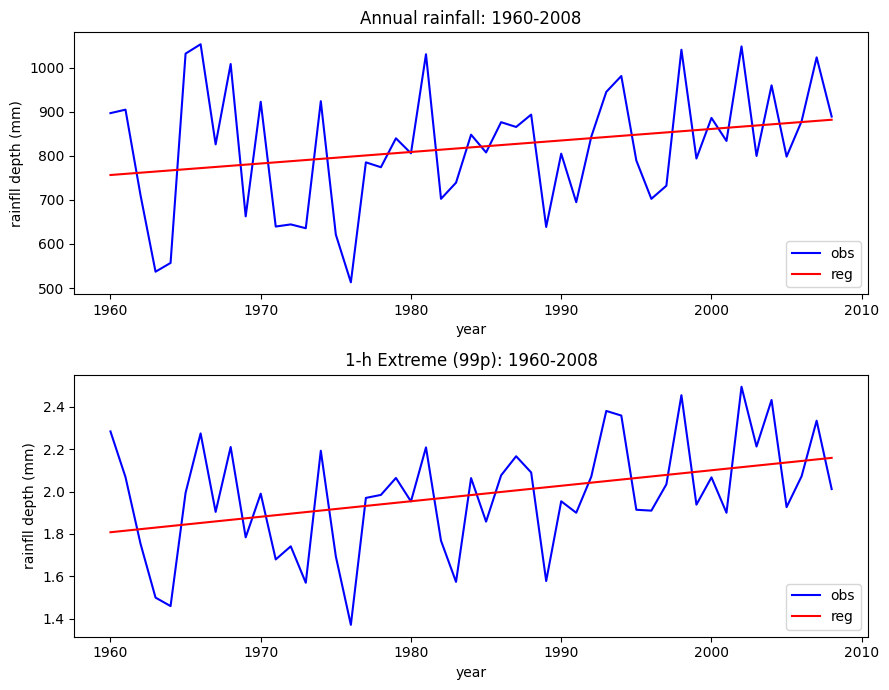

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7))

axes[0].plot(annual_rainfall.index.year, annual_rainfall['Rain Depth'], color='blue', label='obs')
axes[0].plot(annual_rainfall.index.year, b_annual*annual_rainfall.index.year+a_annual, color='red', label='reg')
axes[0].set_title('Annual rainfall: 1960-2008')
axes[0].set_xlabel('year')
axes[0].set_ylabel('rainfll depth (mm)')
axes[0].legend(loc='lower right')

axes[1].plot(annual_rainfall.index.year, percentile_99_hourly_rainfall, color='blue', label='obs')
axes[1].plot(annual_rainfall.index.year, b_hourly*annual_rainfall.index.year+a_hourly, color='red', label='reg')
axes[1].set_title('1-h Extreme (99p): 1960-2008')
axes[1].set_xlabel('year')
axes[1].set_ylabel('rainfll depth (mm)')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

### 2.2 (8%) Please conduct F-test  over _annual rainfall_ time series to check if the 'going-up' trend is statistically significant (assuming $\alpha $ = 1%, one-sided). Please output the calculation and test result, and explain the test result.

#### Note for the output: it shall follow the format below (to 3 decimal places)
--------- Annual Rainfall ---------</br>
Regression sum of squares: sssss</br>
Residual sum of squares: tttttt</br>
Total sum of squares: uuuuuu</br>
Test statistics F = vvvvvv</br>
The upper bound of the critical region is xxxxx</br>


In [5]:
y_est = a_annual + b_annual*annual_rainfall.index.year

y_mean = np.mean(annual_rainfall['Rain Depth'])
x_mean = np.mean(annual_rainfall.index.year)

cov_xy_m = np.cov(annual_rainfall.index.year, annual_rainfall['Rain Depth'], ddof=1)
cov_xy = cov_xy_m[0][1]
var_x = cov_xy_m[0][0]
var_y = cov_xy_m[1][1]

ss_reg = np.sum((y_est - (a_annual + b_annual*x_mean))**2)
ss_res = np.sum((annual_rainfall['Rain Depth']-y_est)**2)
ss_total = np.sum((annual_rainfall['Rain Depth']-y_mean)**2)
print(f'Regression sum of squares: {ss_reg:.3f}')
print(f'Residual sum of squares: {ss_res:.3f}')
print(f'Total sum of squares: {ss_total:.3f}')

F = ss_reg / ss_res * (len(annual_rainfall.index.year)-2)
print(f'Test statistics F = {F:.3f}')

alpha = 0.01
dof = len(annual_rainfall.index.year)-2

f_upper = stats.f.ppf(1-alpha, dfn=dof, dfd=dof)
print(f'The upper bound of the critical region is {f_upper:.3f}')

Regression sum of squares: 66949.455
Residual sum of squares: 889790.118
Total sum of squares: 956739.573
Test statistics F = 3.536
The upper bound of the critical region is 1.991


#### Please explain the test result here

The Test statistics ($F$) is not within the ciritcal region (bigger than upper bound). Therefore, we reject the null hypothesis. 
This indicates that there is indeed a going-up trend in the total annual precipitation each year.

### 2.3 (8%) Please conduct F-test (without using s) over _1-hour rainfall extreme_ time series to check if the 'going-up' trend is statistically significant (assuming $\alpha $ = 1%, one-sided). Please output the calculation and test result, and explain the test result.

#### Note for the output: it shall follow the format below (to 3 decimal places)
--------- 1-h Rainfall Extremes ---------</br>
Regression sum of squares: sssss</br>
Residual sum of squares: tttttt</br>
Total sum of squares: uuuuuu</br>
Test statistics F = vvvvvv</br>
The upper bound of the critical region is xxxxx</br>

In [6]:
y_est = a_hourly + b_hourly*annual_rainfall.index.year

y_mean = np.mean(percentile_99_hourly_rainfall)
x_mean = np.mean(annual_rainfall.index.year)

cov_xy_m = np.cov(annual_rainfall.index.year, percentile_99_hourly_rainfall, ddof=1)
cov_xy = cov_xy_m[0][1]
var_x = cov_xy_m[0][0]
var_y = cov_xy_m[1][1]

ss_reg = np.sum((y_est - (a_hourly + b_hourly*x_mean))**2)
ss_res = np.sum((percentile_99_hourly_rainfall-y_est)**2)
ss_total = np.sum((percentile_99_hourly_rainfall-y_mean)**2)
print(f'Regression sum of squares: {ss_reg:.3f}')
print(f'Residual sum of squares: {ss_res:.3f}')
print(f'Total sum of squares: {ss_total:.3f}')

F = ss_reg / ss_res * (len(annual_rainfall.index.year)-2)
print(f'Test statistics F = {F:.3f}')

alpha = 0.01
dof = len(annual_rainfall.index.year)-2

f_upper = stats.f.ppf(1-alpha, dfn=dof, dfd=dof)
print(f'The upper bound of the critical region is {f_upper:.3f}')

Regression sum of squares: 0.523
Residual sum of squares: 2.864
Total sum of squares: 3.387
Test statistics F = 8.583
The upper bound of the critical region is 1.991


#### Please explain the test result here

The Test statistics ($F$) is not within the ciritcal region (bigger than upper bound). Therefore, we reject the null hypothesis. 
This indicates that there is indeed a going-up trend in the 1-hour extreme rainfall each year.